In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer 
import seaborn as sn

In [2]:
train_data = pd.read_csv("../Data/Corrected Datasets/train-dataset.csv",header=0)

In [3]:
train_data.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,...,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,2,2,...,No,No Deposit,Online,Yes,Check-In,Yes,10,218,1,41
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,3,3,...,No,Refundable,Online,Yes,Check-In,No,0,185,1,36
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,3,3,...,No,No Deposit,Online,Yes,Check-In,No,0,119,4,3
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,4,3,...,No,Refundable,Agent,Yes,Check-In,Yes,5,144,1,12
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,1,1,...,No,No Deposit,Direct,No,Check-In,Yes,10,242,1,13


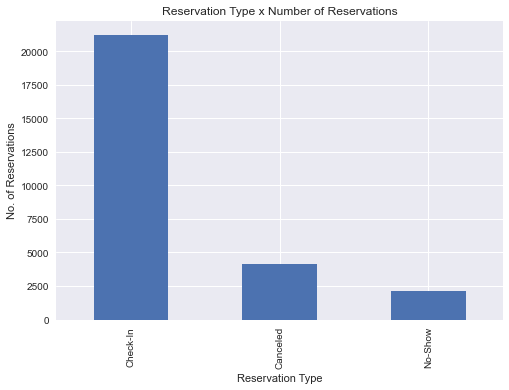

In [4]:
plt.style.use("seaborn")
fig, ax = plt.subplots()
ax = train_data.Reservation_Status.value_counts().plot(title="Reservation Type x Number of Reservations",kind="bar", ylabel="No. of Reservations", xlabel="Reservation Type")

## Cancelled Reservations

In [5]:
cancelled_cust = train_data[train_data.Reservation_Status=="Canceled"]
cancelled_cust.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,...,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap
12830,65894391,M,44,African American,College,>100K,South,City Hotel,2,2,...,No,No Deposit,Agent,No,Canceled,Yes,10,115,2,82
12842,52406663,F,41,caucasian,College,>100K,West,City Hotel,2,2,...,No,No Deposit,Online,Yes,Canceled,Yes,20,112,1,109
12844,58969044,M,24,Latino,Grad,25K --50K,East,City Hotel,2,1,...,No,No Deposit,Online,Yes,Canceled,Yes,20,160,1,194
12846,77884516,F,28,caucasian,College,50K -- 100K,South,Airport Hotels,1,1,...,No,No Deposit,Online,Yes,Canceled,No,0,209,1,75
12852,64351195,M,45,caucasian,College,25K --50K,West,City Hotel,2,1,...,No,Refundable,Online,Yes,Canceled,Yes,5,136,1,-1


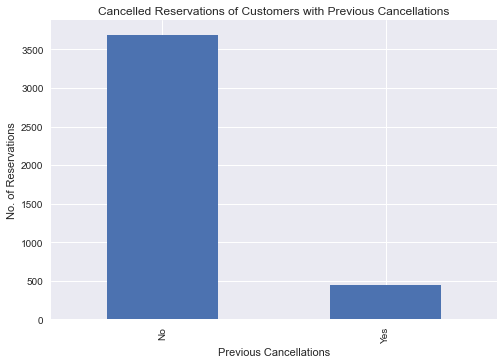

In [6]:
fig, ax = plt.subplots()
ax = cancelled_cust.Previous_Cancellations.value_counts().plot(kind='bar',
    title="Cancelled Reservations of Customers with Previous Cancellations",
                                                              xlabel="Previous Cancellations", ylabel="No. of Reservations")

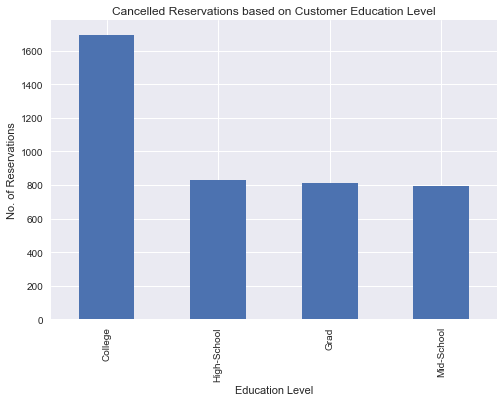

In [7]:
fig, ax = plt.subplots()
ax = cancelled_cust.Educational_Level.value_counts().plot(kind='bar',
    title="Cancelled Reservations based on Customer Education Level",
                                                              xlabel="Education Level", ylabel="No. of Reservations")

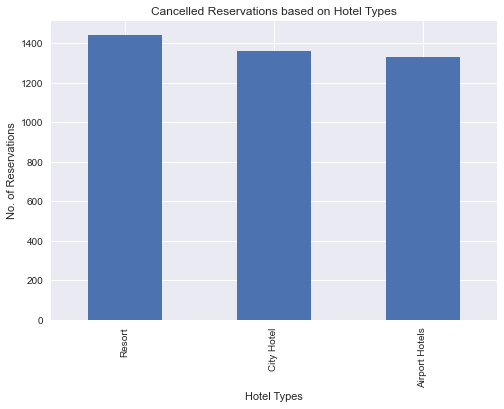

In [8]:
fig, ax = plt.subplots()
ax = cancelled_cust.Hotel_Type.value_counts().plot(kind='bar',
                                                    title="Cancelled Reservations based on Hotel Types",
                                                    xlabel="Hotel Types", ylabel="No. of Reservations")

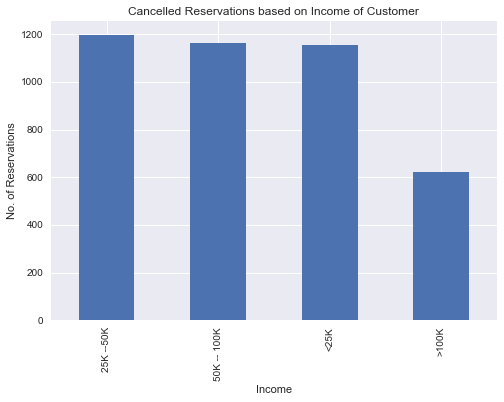

In [9]:
fig, ax =plt.subplots()
ax = cancelled_cust.Income.value_counts().plot(kind='bar', title="Cancelled Reservations based on Income of Customer", xlabel="Income", ylabel="No. of Reservations")

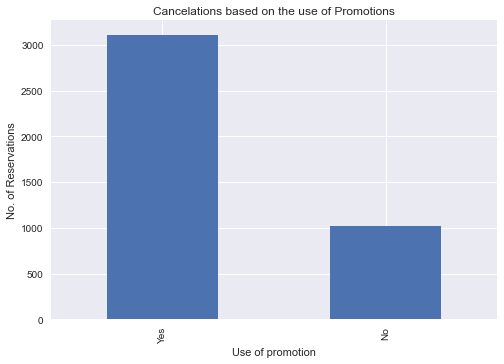

In [10]:
fig, ax =plt.subplots()
ax = cancelled_cust.Use_Promotion.value_counts().plot(kind='bar',title="Cancelations based on the use of Promotions", xlabel="Use of promotion", ylabel="No. of Reservations")

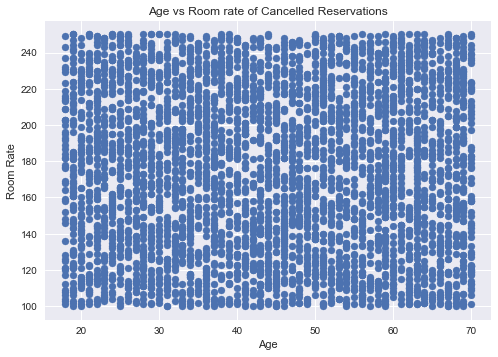

In [11]:
fig, ax = plt.subplots()
scatter = ax.scatter(x=cancelled_cust["Age"], y=cancelled_cust["Room_Rate"])
ax.set(title = "Age vs Room rate of Cancelled Reservations", xlabel="Age", ylabel="Room Rate")
plt.show()

## No Show Reservations

In [12]:
no_show_res = train_data[train_data.Reservation_Status == "No-Show"]
no_show_res.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,...,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap
12831,28838871,F,19,Latino,Grad,25K --50K,West,City Hotel,5,2,...,Yes,No Deposit,Direct,Yes,No-Show,Yes,5,158,3,136
12832,49370462,F,40,African American,College,>100K,South,City Hotel,2,1,...,No,Refundable,Direct,Yes,No-Show,Yes,15,122,2,21
12833,55737260,F,58,African American,Mid-School,50K -- 100K,South,City Hotel,4,3,...,No,Refundable,Direct,No,No-Show,Yes,10,159,1,78
12837,65658296,M,41,African American,College,50K -- 100K,West,Airport Hotels,3,3,...,No,Refundable,Online,Yes,No-Show,Yes,20,117,2,102
12840,94318085,F,26,Latino,College,25K --50K,North,Resort,5,1,...,No,No Deposit,Direct,No,No-Show,Yes,5,118,3,20


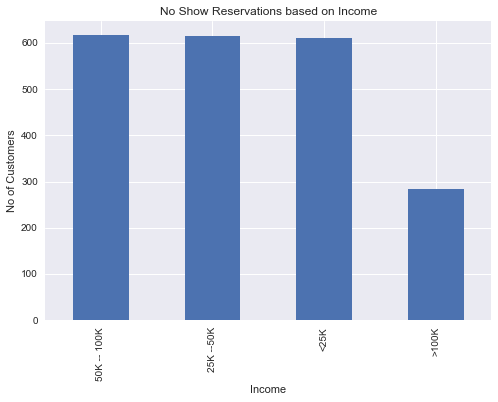

In [13]:
fig, ax = plt.subplots()
#based on income
no_show_res.Income.value_counts().plot(kind='bar', title="No Show Reservations based on Income", xlabel="Income", ylabel="No of Customers");

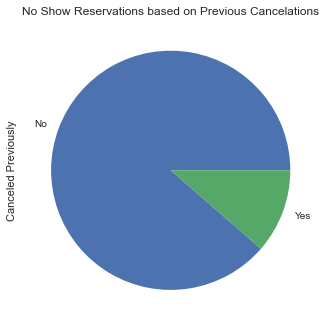

In [14]:
fig, ax = plt.subplots()

#based on use of Previous cancelation
no_show_res.Previous_Cancellations.value_counts().plot(kind='pie', title="No Show Reservations based on Previous Cancelations", ylabel="Canceled Previously");

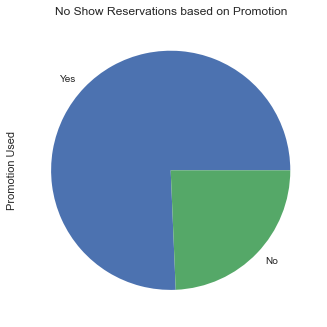

In [15]:
fig, ax = plt.subplots()

#based on use of Promotions
no_show_res.Use_Promotion.value_counts().plot(kind='pie', title="No Show Reservations based on Promotion", ylabel="Promotion Used");

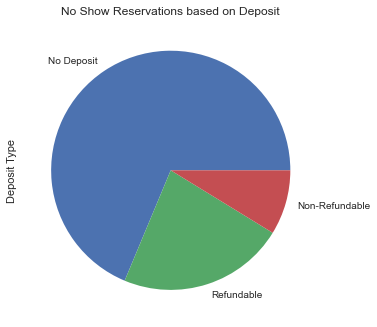

In [16]:
fig, ax = plt.subplots()
#based on Deposit type 
no_show_res.Deposit_type.value_counts().plot(kind='pie', title="No Show Reservations based on Deposit", ylabel="Deposit Type");

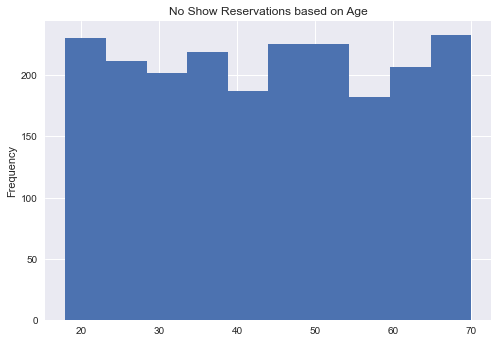

In [17]:
fig, ax = plt.subplots()

#based on Age 
no_show_res.Age.plot(kind='hist', title="No Show Reservations based on Age", xlabel="Age", ylabel="No of Customers");



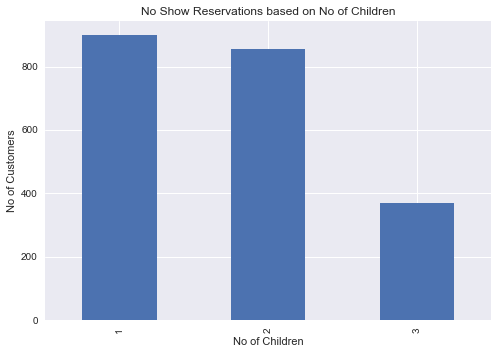

In [18]:
fig, ax = plt.subplots()

#based on No. of Children
no_show_res.Children.value_counts().plot(kind='bar', title="No Show Reservations based on No of Children", 
                                         xlabel="No of Children", ylabel="No of Customers");



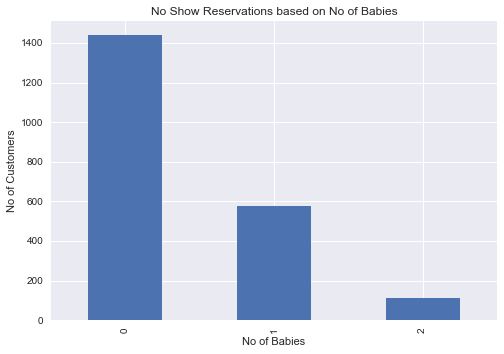

In [19]:
fig, ax = plt.subplots()

#based on No of Babies
no_show_res.Babies.value_counts().plot(kind='bar', title="No Show Reservations based on No of Babies", 
                                       xlabel="No of Babies", ylabel="No of Customers");


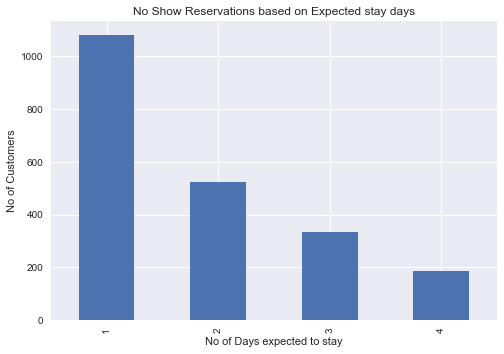

In [20]:
fig, ax = plt.subplots()

#based on Expected Days of Stay 
no_show_res.Expected_stay_days.value_counts().plot(kind='bar', title="No Show Reservations based on Expected stay days", 
                                                   xlabel="No of Days expected to stay", ylabel="No of Customers");


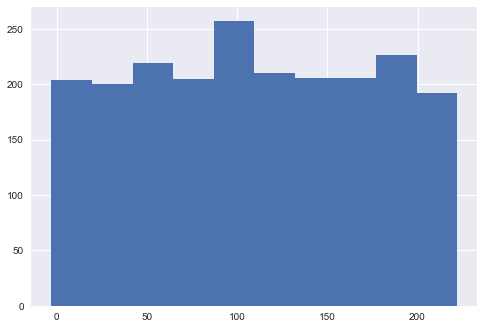

In [21]:
fig, ax = plt.subplots()

#based on Reservation Gap 
no_show_res["Reservation_gap"].hist();


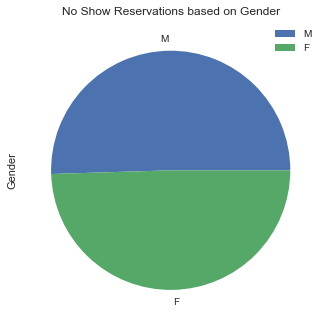

In [22]:
fig, ax = plt.subplots()

#based on Gender
no_show_res.Gender.value_counts().plot(kind='pie', title="No Show Reservations based on Gender", 
                                       xlabel="Gender", legend=True);


# Entire Dataset

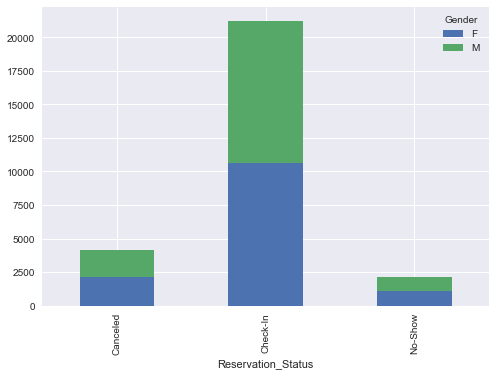

In [23]:
train_data.groupby(['Reservation_Status','Gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

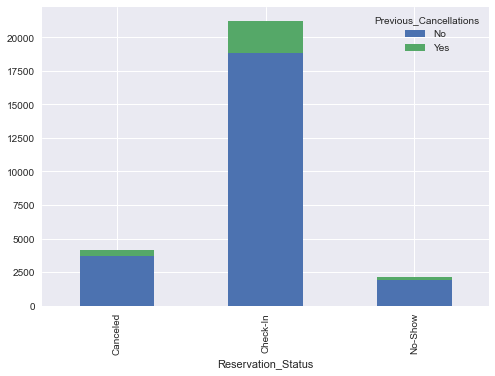

In [24]:
train_data.groupby(['Reservation_Status','Previous_Cancellations']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

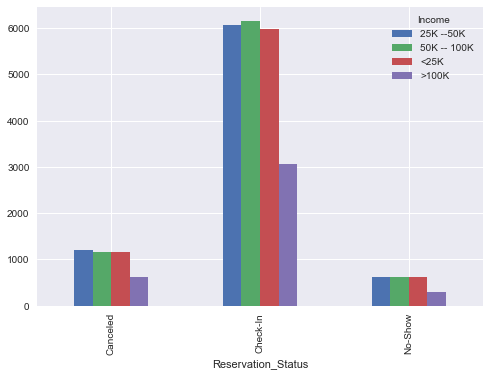

In [25]:
train_data.groupby(['Reservation_Status','Income']).size().unstack().plot(kind='bar')
plt.show()

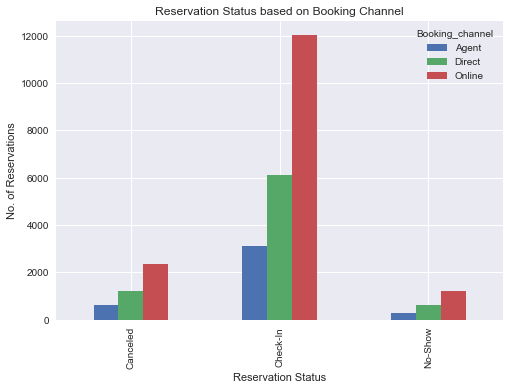

In [26]:
train_data.groupby(['Reservation_Status','Booking_channel']).size().unstack().plot(kind='bar',title="Reservation Status based on Booking Channel",
                                                                                   xlabel="Reservation Status", ylabel="No. of Reservations")
plt.show()

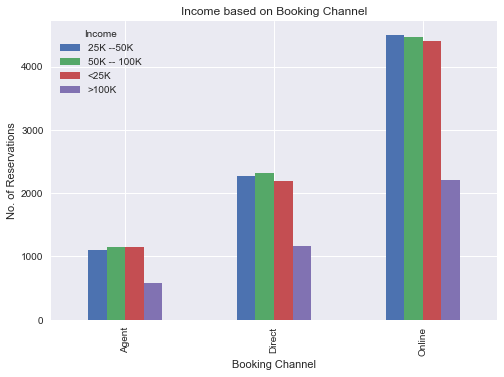

In [27]:
train_data.groupby(['Booking_channel','Income']).size().unstack().plot(kind='bar',title="Income based on Booking Channel",
                                                                                   xlabel="Booking Channel", ylabel="No. of Reservations")
plt.show()

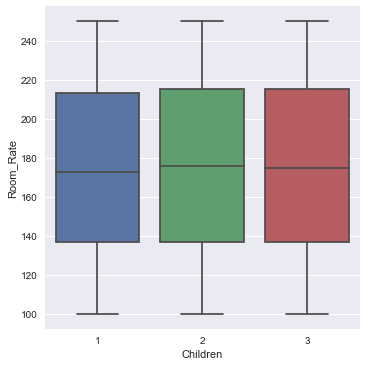

In [28]:
sn.catplot(x="Children", y="Room_Rate", kind="box", data=train_data);

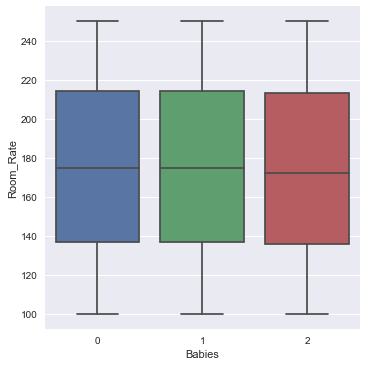

In [29]:
sn.catplot(x="Babies", y="Room_Rate", kind="box", data=train_data);

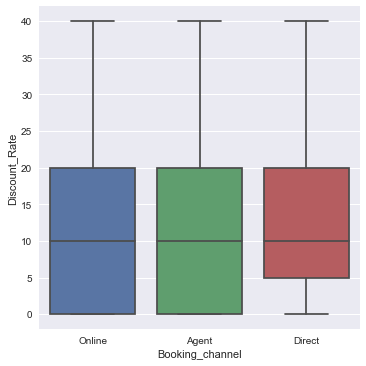

In [30]:
sn.catplot(x="Booking_channel", y="Discount_Rate", kind="box", data=train_data);

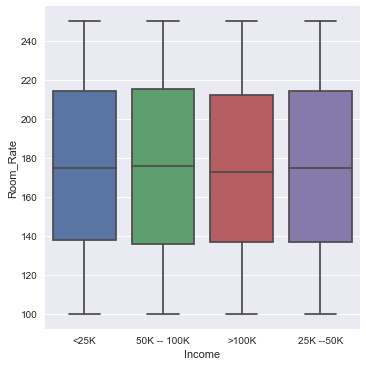

In [31]:
sn.catplot(x="Income", y="Room_Rate", kind="box", data=train_data);

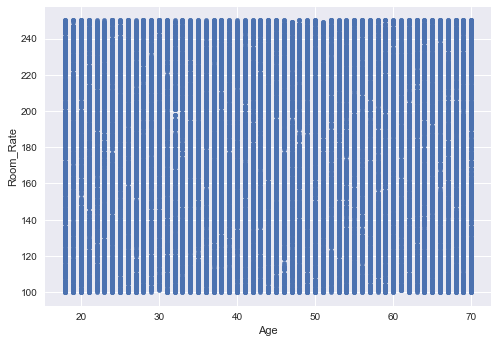

In [32]:
scatter = train_data.plot.scatter("Age","Room_Rate")

## Correlation Matrices

In [33]:
train_data_corr = train_data.corr()
train_data_corr

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap
Reservation-id,1.000000,0.002433,0.014038,0.006086,-0.007016,-0.001515,0.003251,-0.005023,0.004031
Age,0.002433,1.000000,0.005065,0.004385,0.003809,0.006335,-0.000178,-0.006275,0.012485
Adults,0.014038,0.005065,1.000000,-0.003966,0.004384,0.003839,-0.006613,-0.000363,-0.003353
Children,0.006086,0.004385,-0.003966,1.000000,0.000518,-0.010817,0.007783,0.009788,-0.009894
Babies,-0.007016,0.003809,0.004384,0.000518,1.000000,-0.006798,-0.004881,-0.005837,-0.001940
Discount_Rate,-0.001515,0.006335,0.003839,-0.010817,-0.006798,1.000000,-0.004200,0.003288,0.013085
Room_Rate,0.003251,-0.000178,-0.006613,0.007783,-0.004881,-0.004200,1.000000,-0.012215,0.003737
Expected_stay_days,-0.005023,-0.006275,-0.000363,0.009788,-0.005837,0.003288,-0.012215,1.000000,-0.015712
Reservation_gap,0.004031,0.012485,-0.003353,-0.009894,-0.001940,0.013085,0.003737,-0.015712,1.000000


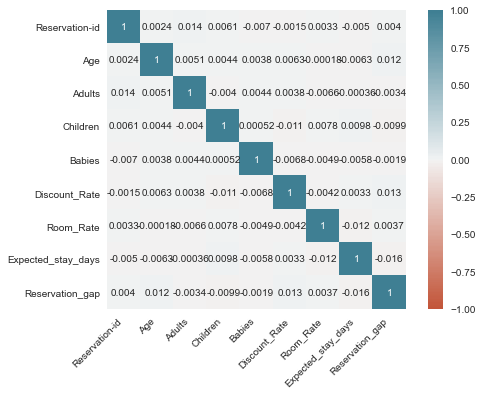

In [34]:
ax = sn.heatmap(train_data_corr, annot=True, vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [35]:
cancelled_res_corr = cancelled_cust.corr()
cancelled_res_corr

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap
Reservation-id,1.000000,0.018941,0.015652,0.015702,0.010380,0.006998,0.012551,0.000211,0.013860
Age,0.018941,1.000000,0.003727,0.032452,0.004480,0.018369,-0.004797,0.001108,-0.001983
Adults,0.015652,0.003727,1.000000,0.016641,-0.013545,-0.016448,0.022581,0.011300,-0.017929
Children,0.015702,0.032452,0.016641,1.000000,-0.016926,-0.008580,0.016485,0.009878,-0.014151
Babies,0.010380,0.004480,-0.013545,-0.016926,1.000000,-0.009565,-0.006128,-0.010031,0.019057
Discount_Rate,0.006998,0.018369,-0.016448,-0.008580,-0.009565,1.000000,-0.001196,-0.006172,0.001464
Room_Rate,0.012551,-0.004797,0.022581,0.016485,-0.006128,-0.001196,1.000000,-0.016059,-0.014135
Expected_stay_days,0.000211,0.001108,0.011300,0.009878,-0.010031,-0.006172,-0.016059,1.000000,-0.013820
Reservation_gap,0.013860,-0.001983,-0.017929,-0.014151,0.019057,0.001464,-0.014135,-0.013820,1.000000


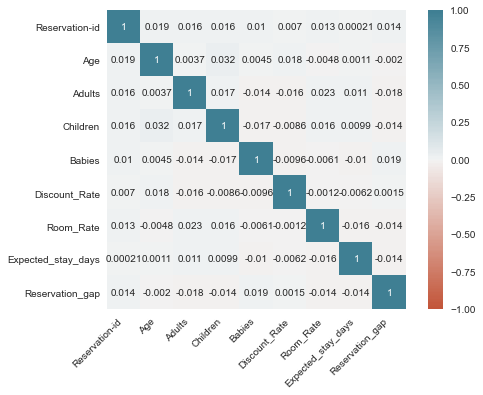

In [36]:
ax = sn.heatmap(cancelled_res_corr, annot=True, vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [37]:
data_cat_cols = ['Reservation_Status', 'Ethnicity', 'Educational_Level', 'Income', 'Country_region',
                 'Hotel_Type', 'Meal_Type', 'Visted_Previously',
                 'Previous_Cancellations', 'Deposit_type', 'Booking_channel',
                 'Required_Car_Parking', 'Use_Promotion']

In [38]:
train_data_enc=train_data
train_data_enc

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Adults,Children,...,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,2,2,...,No,No Deposit,Online,Yes,Check-In,Yes,10,218,1,41
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,3,3,...,No,Refundable,Online,Yes,Check-In,No,0,185,1,36
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,3,3,...,No,No Deposit,Online,Yes,Check-In,No,0,119,4,3
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,4,3,...,No,Refundable,Agent,Yes,Check-In,Yes,5,144,1,12
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,1,1,...,No,No Deposit,Direct,No,Check-In,Yes,10,242,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,F,49,African American,Mid-School,<25K,West,City Hotel,1,2,...,Yes,No Deposit,Online,Yes,Check-In,Yes,10,100,1,37
27495,56414525,F,49,Asian American,College,25K --50K,South,Airport Hotels,2,1,...,No,Refundable,Agent,Yes,No-Show,Yes,40,194,1,127
27496,52023375,F,49,Latino,High-School,50K -- 100K,South,Airport Hotels,2,1,...,No,No Deposit,Direct,Yes,Check-In,Yes,5,202,1,9
27497,98041387,M,65,African American,College,25K --50K,South,Airport Hotels,3,2,...,No,No Deposit,Online,No,Canceled,Yes,20,157,1,98


In [39]:
train_data_cat = train_data[data_cat_cols]

In [40]:
train_data_cat.head()

,Reservation_Status,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion
0,Check-In,Latino,Grad,<25K,North,City Hotel,BB,No,No,No Deposit,Online,Yes,Yes
1,Check-In,Latino,Mid-School,50K -- 100K,East,City Hotel,BB,No,No,Refundable,Online,Yes,No
2,Check-In,caucasian,Grad,<25K,East,City Hotel,BB,No,No,No Deposit,Online,Yes,No
3,Check-In,African American,College,>100K,South,Airport Hotels,BB,No,No,Refundable,Agent,Yes,Yes
4,Check-In,Latino,High-School,25K --50K,East,Resort,BB,No,No,No Deposit,Direct,No,Yes


In [41]:
one_hot = pd.get_dummies(train_data_cat)

In [42]:
one_hot.head()

,Reservation_Status_Canceled,Reservation_Status_Check-In,Reservation_Status_No-Show,Ethnicity_African American,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_College,Educational_Level_Grad,Educational_Level_High-School,...,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
0,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
2,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,1,0
3,0,1,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1
4,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1


In [43]:
train_data_enc = train_data_enc.drop(data_cat_cols, axis=1)

In [44]:
train_data_enc

,Reservation-id,Gender,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap
0,39428300,F,40,2,2,0,10,218,1,41
1,77491756,F,49,3,3,0,0,185,1,36
2,73747291,F,42,3,3,0,0,119,4,3
3,67301739,M,25,4,3,0,5,144,1,12
4,77222321,F,62,1,1,0,10,242,1,13
...,...,...,...,...,...,...,...,...,...,...
27494,15645505,F,49,1,2,1,10,100,1,37
27495,56414525,F,49,2,1,0,40,194,1,127
27496,52023375,F,49,2,1,1,5,202,1,9
27497,98041387,M,65,3,2,0,20,157,1,98


In [45]:
train_data_enc = train_data_enc.join(one_hot)

In [46]:
train_data_enc.head()

,Reservation-id,Gender,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,Expected_stay_days,Reservation_gap,...,Deposit_type_No Deposit,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Agent,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_No,Required_Car_Parking_Yes,Use_Promotion_No,Use_Promotion_Yes
0,39428300,F,40,2,2,0,10,218,1,41,...,1,0,0,0,0,1,0,1,0,1
1,77491756,F,49,3,3,0,0,185,1,36,...,0,0,1,0,0,1,0,1,1,0
2,73747291,F,42,3,3,0,0,119,4,3,...,1,0,0,0,0,1,0,1,1,0
3,67301739,M,25,4,3,0,5,144,1,12,...,0,0,1,1,0,0,0,1,0,1
4,77222321,F,62,1,1,0,10,242,1,13,...,1,0,0,0,1,0,1,0,0,1


In [47]:
train_data_enc = train_data_enc.drop("Reservation-id",axis=1)

In [48]:
train_data_enc = train_data_enc.drop(["Age","Adults","Children","Babies","Gender"],axis=1)

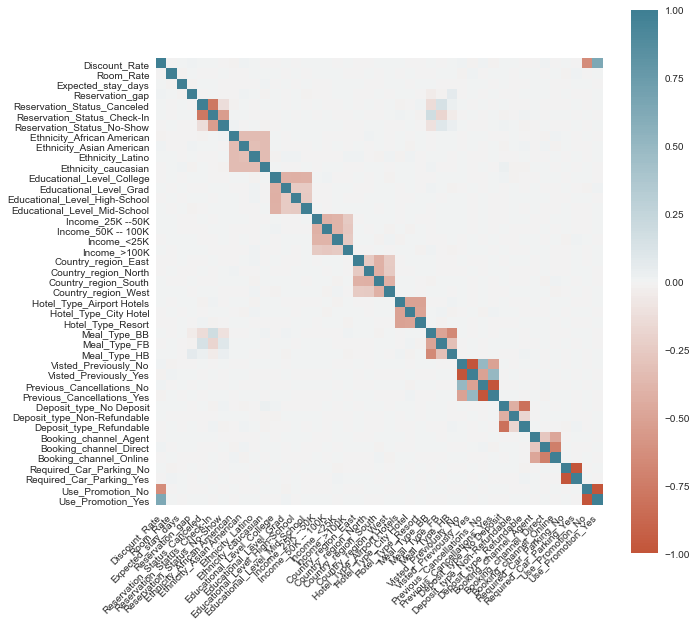

In [49]:
fig, ax0 = plt.subplots(figsize=(10,10))
ax = sn.heatmap(train_data_enc.corr(), 
                #annot=True,
                cmap=sn.diverging_palette(20, 220, n=200),
                square=True,ax=ax0)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()